# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [63]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = ("Resources/city_data.csv")
ride_data_to_load = ("Resources/ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [66]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city", "city"])

# Display the data table for preview
pyber_data_df.tail(10)

,city,date,fare,ride_id,driver_count,type
2365,Harringtonfort,2019-01-09 15:30:35,31.84,3730685356921,4,Rural
2366,West Heather,2019-03-12 04:22:26,26.55,7035849392668,4,Rural
2367,West Heather,2019-02-22 09:01:37,17.40,8702491506161,4,Rural
2368,West Heather,2019-02-22 01:46:43,33.38,5551691454078,4,Rural
2369,West Heather,2019-02-04 16:29:23,13.97,7118893881453,4,Rural
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural
2374,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [72]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby("type").count()["ride_id"]
total_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [74]:
total_driver_count = city_data_df.groupby("type").sum()["driver_count"]
total_driver_count.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [61]:
#  3. Get the total amount of fares for each city type
total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare.head()

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [77]:
#  4. Get the average fare per ride for each city type. 
avg_fare = total_fare/total_ride_count
avg_fare.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [78]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = total_fare/total_driver_count
avg_driver_fare.head()

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [90]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
 'Total Rides':total_ride_count,
 'Total Drivers':total_driver_count,
 'Total Fares':total_fare,
 'Avarage Fare Per Ride':avg_fare,
 'Avarage Fare Per Driver':avg_driver_fare
}
)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Avarage Fare Per Ride,Avarage Fare Per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [100]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avarage Fare Per Ride,Avarage Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [112]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avarage Fare Per Ride,Avarage Fare Per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [114]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,$31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,$19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,$24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,$13.89,424254840012,5,Urban


In [117]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_typedate = pyber_data_df.groupby(["type","date"]).sum()["fare"]
total_fare_typedate

type   date               
Rural  2019-01-01 09:45:36   $43.69
       2019-01-02 11:18:32   $52.12
       2019-01-03 19:51:01   $19.90
       2019-01-04 03:31:26   $24.88
       2019-01-06 07:38:40   $47.33
                              ...  
Urban  2019-05-08 04:20:00   $21.99
       2019-05-08 04:39:49   $18.45
       2019-05-08 07:29:01   $18.55
       2019-05-08 11:38:35   $19.77
       2019-05-08 13:10:18   $18.04
Name: fare, Length: 2375, dtype: float64

In [118]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_typedate = total_fare_typedate.reset_index()
total_fare_typedate

,type,date,fare
0,Rural,2019-01-01 09:45:36,$43.69
1,Rural,2019-01-02 11:18:32,$52.12
2,Rural,2019-01-03 19:51:01,$19.90
3,Rural,2019-01-04 03:31:26,$24.88
4,Rural,2019-01-06 07:38:40,$47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77


In [123]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_dates_pivot = total_fare_typedate.pivot(index = "date", columns = ["type"],values = ["fare"])
pyber_dates_pivot

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN $37.91
2019-01-01 00:46:46   NaN   $47.74    NaN
2019-01-01 02:07:24   NaN   $24.07    NaN
2019-01-01 03:46:50   NaN      NaN  $7.57
2019-01-01 05:23:21   NaN      NaN $10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN $21.99
2019-05-08 04:39:49   NaN      NaN $18.45
2019-05-08 07:29:01   NaN      NaN $18.55
2019-05-08 11:38:35   NaN      NaN $19.77
2019-05-08 13:10:18   NaN      NaN $18.04

[2375 rows x 3 columns]

In [125]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fares_date_type_daterange = pyber_dates_pivot.loc[(pyber_dates_pivot.index >= "2019-01-01") & 
                                (pyber_dates_pivot.index <= "2019-04-29")]
fares_date_type_daterange

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN $37.91
2019-01-01 00:46:46   NaN   $47.74    NaN
2019-01-01 02:07:24   NaN   $24.07    NaN
2019-01-01 03:46:50   NaN      NaN  $7.57
2019-01-01 05:23:21   NaN      NaN $10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN $11.46
2019-04-28 16:29:16   NaN      NaN $36.42
2019-04-28 17:26:52   NaN      NaN $31.43
2019-04-28 17:38:09   NaN   $34.87    NaN
2019-04-28 19:35:03   NaN   $16.96    NaN

[2196 rows x 3 columns]

In [127]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

fares_date_type_daterange.index = pd.to_datetime(fares_date_type_daterange.index)
fares_date_type_daterange

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN $37.91
2019-01-01 00:46:46   NaN   $47.74    NaN
2019-01-01 02:07:24   NaN   $24.07    NaN
2019-01-01 03:46:50   NaN      NaN  $7.57
2019-01-01 05:23:21   NaN      NaN $10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN $11.46
2019-04-28 16:29:16   NaN      NaN $36.42
2019-04-28 17:26:52   NaN      NaN $31.43
2019-04-28 17:38:09   NaN   $34.87    NaN
2019-04-28 19:35:03   NaN   $16.96    NaN

[2196 rows x 3 columns]

In [128]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_date_type_daterange.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [129]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_week_type_daterange = fares_date_type_daterange.resample("W").sum()
fares_week_type_daterange

fare                    
type         Rural  Suburban     Urban
date                                  
2019-01-06 $187.92   $721.60 $1,661.68
2019-01-13  $67.65 $1,105.13 $2,050.43
2019-01-20 $306.00 $1,218.20 $1,939.02
2019-01-27 $179.69 $1,203.28 $2,129.51
2019-02-03 $333.08 $1,042.79 $2,086.94
2019-02-10 $115.80   $974.34 $2,162.64
2019-02-17  $95.82 $1,045.50 $2,235.07
2019-02-24 $419.06 $1,412.74 $2,466.29
2019-03-03 $175.14   $858.46 $2,218.20
2019-03-10 $303.94   $925.27 $2,470.93
2019-03-17 $163.39   $906.20 $2,044.42
2019-03-24 $189.76 $1,122.20 $2,368.37
2019-03-31 $199.42 $1,045.06 $1,942.77
2019-04-07 $501.24 $1,010.73 $2,356.70
2019-04-14 $269.79   $784.82 $2,390.72
2019-04-21 $214.14 $1,149.27 $2,303.80
2019-04-28 $191.85 $1,357.75 $2,238.29

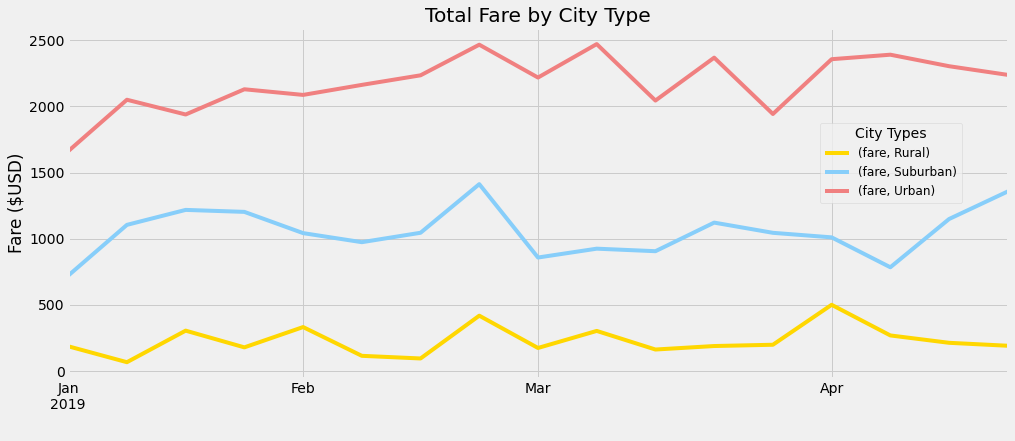

In [133]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,6))
fares_week_type_daterange.plot(kind="line", ax=ax, color=["gold", "lightskyblue", "lightcoral"])
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel(" ")
lgnd = plt.legend(fontsize="12", mode="Expanded", loc=(0.8,0.5), title="City Types")

# Save Figure
plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()
